<a href="https://colab.research.google.com/github/idir15/Classification-des-signaux-cardiaque-ECG-/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

fe=360
t=np.linspace(0,187*360,187)
#charger les fichiers normal et abnormal dans une liste 
datalist = [pd.read_csv(''+x+'.csv') for x in ['normal', 'abnormal' ]]
# indexer l'axe des x de 0 a 187
for x in datalist :
    x.columns = list(range(len(x.columns)))

#concaténation et melange des données 
data = pd.concat(datalist, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
data = data.rename({187: 'label'}, axis=1)

#Generation des données et des labels
label = data['label'].copy()
Data = data.drop('label', axis=1)

#Generation des données et des label d'entrainnement et de test
data_train, data_test, label_train, label_test = train_test_split(
    Data, label, test_size=0.3, random_state=1)


In [ ]:
print(data.head(15))

           0         1         2         3         4         5         6  \
0   1.000000  0.887073  0.774146  0.713224  0.682021  0.699851  0.595840   
1   1.000000  0.684376  0.395907  0.288863  0.262102  0.231405  0.234160   
2   1.000000  0.645543  0.270195  0.089833  0.038997  0.064067  0.045265   
3   0.995881  0.993821  0.959835  0.872297  0.542739  0.054583  0.000000   
4   0.996020  0.323383  0.109453  0.035821  0.264677  0.342289  0.367164   
5   0.963246  1.000000  0.820388  0.414355  0.182039  0.070735  0.125520   
6   0.964159  0.536598  0.286976  0.109288  0.075215  0.068147  0.039374   
7   1.000000  0.886147  0.480085  0.201974  0.000000  0.017624  0.125485   
8   1.000000  0.557225  0.304432  0.031985  0.000000  0.021965  0.146435   
9   0.943678  1.000000  0.794713  0.592414  0.482759  0.399310  0.328276   
10  0.963311  1.000000  0.289933  0.077852  0.041163  0.058166  0.149441   
11  0.939286  0.567857  0.406633  0.239286  0.180102  0.122959  0.067347   
12  0.975672

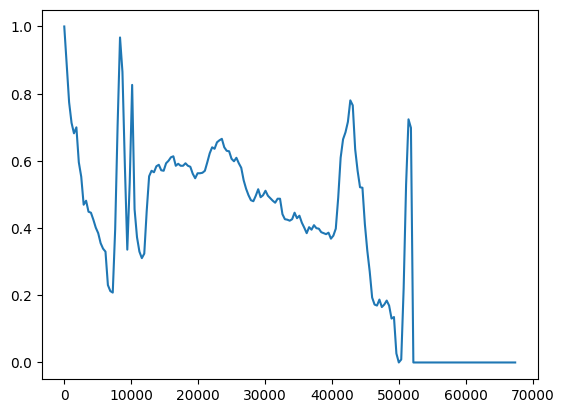

In [ ]:
plt.plot(t,Data.iloc[0])

Création du modele

In [ ]:
inputs = keras.Input(shape=(187))
#declaration des couches cachees
expend=tf.expand_dims(inputs, axis=2)
lstm = layers.LSTM(units=128,return_sequences=True)(expend)
flatten=layers.Flatten()(lstm)
outputs = layers.Dense(1, activation="sigmoid")(flatten)
model = keras.Model(inputs=inputs, outputs=outputs, name="test_model")
model.summary()


Model: "test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 187)]             0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 187, 1)           0         
                                                                 
 lstm (LSTM)                 (None, 187, 128)          66560     
                                                                 
 flatten (Flatten)           (None, 23936)             0         
                                                                 
 dense (Dense)               (None, 1)                 23937     
                                                                 
Total params: 90,497
Trainable params: 90,497
Non-trainable params: 0
_________________________________________________________________


compilation et entrainnement du LSTM

In [ ]:
model.compile(optimizer='Adam', loss="BinaryCrossentropy", metrics=["accuracy", keras.metrics.AUC(name="auc")])
history=model.fit(
    data_train,
    label_train,
    validation_split=0.2,.
    batch_size=32,
    epochs=150,
    callbacks= [
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]

)

Epoch 1/150
255/255 [==============================] - 67s 254ms/step - loss: 0.4599 - accuracy: 0.7641 - auc: 0.8169 - val_loss: 0.4166 - val_accuracy: 0.8022 - val_auc: 0.8570
Epoch 2/150
255/255 [==============================] - 64s 252ms/step - loss: 0.4243 - accuracy: 0.7964 - auc: 0.8528 - val_loss: 0.4045 - val_accuracy: 0.8149 - val_auc: 0.8673
Epoch 3/150
255/255 [==============================] - 64s 250ms/step - loss: 0.4034 - accuracy: 0.8063 - auc: 0.8664 - val_loss: 0.3615 - val_accuracy: 0.8370 - val_auc: 0.8963
Epoch 4/150
255/255 [==============================] - 64s 251ms/step - loss: 0.3608 - accuracy: 0.8277 - auc: 0.8955 - val_loss: 0.3346 - val_accuracy: 0.8385 - val_auc: 0.9124
Epoch 5/150
255/255 [==============================] - 64s 250ms/step - loss: 0.3299 - accuracy: 0.8514 - auc: 0.9142 - val_loss: 0.3032 - val_accuracy: 0.8586 - val_auc: 0.9315
Epoch 6/150
255/255 [==============================] - 64s 251ms/step - loss: 0.2972 - accuracy: 0.8727 - auc:

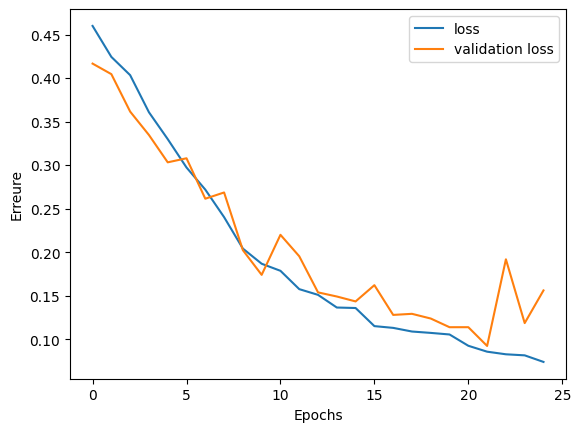

In [ ]:
fig,axs=plt.subplots()
axs.plot(history.history['loss'])
axs.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Erreure')
plt.legend(['loss','validation loss'])

In [ ]:
model.evaluate(data_test, label_test)


137/137 [==============================] - 13s 92ms/step - loss: 0.0945 - accuracy: 0.9684 - auc: 0.9922


[0.09447973221540451, 0.968384861946106, 0.9922067523002625]